<a href="https://colab.research.google.com/github/2303A52222/Explainable-AI-assignment/blob/main/2303A52222_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADINA ISRAN**

2303A52222 - 42

**1. Green Cycle – E-Bike Company**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.DataFrame({
    'Instagram_Reels': [1, 2, 3, 1, 2],
    'Test_Rides': [20, 35, 48, 25, 38]
})

X = data[['Instagram_Reels']]
y = data['Test_Rides']

# 1. Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# 2. Baseline Value (mean of y)
baseline = y.mean()

# 3. Predictions and SHAP values
data['Predicted'] = model.predict(X)
data['SHAP_Value'] = data['Predicted'] - baseline
data['Final_Prediction_Check'] = baseline + data['SHAP_Value']
data['Prediction_Error'] = data['Predicted'] - data['Test_Rides']
data['Over_Under'] = data['Prediction_Error'].apply(lambda x: 'Over' if x > 0 else 'Under' if x < 0 else 'Exact')

# Display coefficients and results
print("🔢 Linear Regression Coefficients")
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient (Instagram Reels): {coefficient:.2f}")
print("\n📊 Baseline Value")
print(f"Baseline (mean of y): {baseline:.2f}")
print("\n📈 Results Table")
print(data)

# 6. Summary Analysis
def summary_analysis(data):
    mae = np.mean(abs(data['Prediction_Error']))
    print("\n📋 Summary Analysis")
    print(f"Model Accuracy (MAE): {mae:.2f}")
    print("Trend: Test ride bookings increase with more Instagram reels.")
    print("SHAP Insight: SHAP values clearly show how each number of reels contributed to deviation from the average (baseline).")

summary_analysis(data)


🔢 Linear Regression Coefficients
Intercept: 9.93
Coefficient (Instagram Reels): 12.93

📊 Baseline Value
Baseline (mean of y): 33.20

📈 Results Table
   Instagram_Reels  Test_Rides  Predicted  SHAP_Value  Final_Prediction_Check  \
0                1          20  22.857143  -10.342857               22.857143   
1                2          35  35.785714    2.585714               35.785714   
2                3          48  48.714286   15.514286               48.714286   
3                1          25  22.857143  -10.342857               22.857143   
4                2          38  35.785714    2.585714               35.785714   

   Prediction_Error Over_Under  
0          2.857143       Over  
1          0.785714       Over  
2          0.714286       Over  
3         -2.142857      Under  
4         -2.214286      Under  

📋 Summary Analysis
Model Accuracy (MAE): 1.74
Trend: Test ride bookings increase with more Instagram reels.
SHAP Insight: SHAP values clearly show how each number of

**2. GoFit – Gym Membership Signups using Multiple Linear
Regression and SHAP Analysis**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the dataset
data = {
    'Trainers': [5, 4, 6, 3, 2],
    'Ad_Spend': [50, 40, 60, 30, 20],
    'Signups': [80, 70, 90, 60, 50]
}

df = pd.DataFrame(data)

X = df[['Trainers', 'Ad_Spend']]
y = df['Signups']

# Step 2: Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Model coefficients:", coefficients)
print("Intercept:", intercept)

# Step 3: Calculate the Baseline (mean of y)
baseline = y.mean()
print("Baseline (mean signups):", baseline)

# Step 4: Calculate SHAP Values for each record
feature_means = X.mean()

def compute_shap_values(row, feature_means, coefficients):
    return (row - feature_means) * coefficients

results = []

for idx, row in X.iterrows():
    shap_values = compute_shap_values(row, feature_means, coefficients)
    shap_trainers = shap_values['Trainers']
    shap_ad = shap_values['Ad_Spend']
    shap_total = shap_trainers + shap_ad
    prediction = baseline + shap_total
    actual = y.iloc[idx]

    results.append({
        'Trainers': row['Trainers'],
        'Ad_Spend': row['Ad_Spend'],
        'Prediction': prediction,
        'Actual': actual,
        'SHAP_Trainers': shap_trainers,
        'SHAP_Ad_Spend': shap_ad,
        'Error': prediction - actual,
        'Over/Under': 'Over' if prediction > actual else 'Under' if prediction < actual else 'Exact'
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
print("\n--- Prediction Results ---")
print(results_df[['Trainers', 'Ad_Spend', 'Prediction', 'Actual', 'SHAP_Trainers', 'SHAP_Ad_Spend', 'Error', 'Over/Under']])


Model coefficients: [0.0990099  0.99009901]
Intercept: 29.99999999999998
Baseline (mean signups): 70.0

--- Prediction Results ---
   Trainers  Ad_Spend  Prediction  Actual  SHAP_Trainers  SHAP_Ad_Spend  \
0         5        50        80.0      80        0.09901        9.90099   
1         4        40        70.0      70        0.00000        0.00000   
2         6        60        90.0      90        0.19802       19.80198   
3         3        30        60.0      60       -0.09901       -9.90099   
4         2        20        50.0      50       -0.19802      -19.80198   

          Error Over/Under  
0  0.000000e+00      Exact  
1  0.000000e+00      Exact  
2  1.421085e-14       Over  
3 -7.105427e-15      Under  
4 -1.421085e-14      Under  


**3. Regression with Diabetes Dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load the Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="disease_progression")

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
coefficients = model.coef_     # array of feature coefficients
intercept = model.intercept_   # model intercept

# 3. Calculate the Baseline (mean of training targets)
baseline = y_train.mean()
print("Baseline (Mean of training target):", baseline)

# 4. Manual SHAP Values Computation (based on coefficients)
# SHAP value for feature i = coefficient[i] * (feature_value[i] - mean_feature_value[i])
feature_means = X_train.mean()

def compute_shap_values(x, feature_means, coefficients):
    """Compute SHAP values for a single sample using linear model."""
    return (x - feature_means) * coefficients

# For each test sample
results = []

for i in range(len(X_test)):
    x_sample = X_test.iloc[i]
    shap_values = compute_shap_values(x_sample, feature_means, coefficients)
    prediction = baseline + shap_values.sum()
    actual = y_test.iloc[i]

    result = {
        'Prediction': prediction,
        'Actual': actual,
        'Error': prediction - actual,
        'Over/Under': 'Over' if prediction > actual else 'Under',
        'SHAP Values': shap_values.to_dict(),
        'Total SHAP Sum': shap_values.sum(),
    }
    results.append(result)

# Convert results to DataFrame for easier inspection
results_df = pd.DataFrame(results)
print(results_df[['Prediction', 'Actual', 'Error', 'Over/Under']])

# 5. Interpret SHAP for one example (e.g., first test sample)
sample_index = 0
print("\n--- SHAP Explanation for Test Sample #{} ---".format(sample_index))
print("Baseline (mean):", baseline)
print("SHAP Contributions:")
for feat, value in results[sample_index]['SHAP Values'].items():
    print(f"{feat}: {value:.4f}")
print(f"Prediction: {results[sample_index]['Prediction']:.2f}")
print(f"Actual: {results[sample_index]['Actual']:.2f}")
print(f"Over/Under: {results[sample_index]['Over/Under']}")

Baseline (Mean of training target): 153.73654390934846
    Prediction  Actual       Error Over/Under
0   139.547558   219.0  -79.452442      Under
1   179.517208    70.0  109.517208       Over
2   134.038756   202.0  -67.961244      Under
3   291.417029   230.0   61.417029       Over
4   123.789659   111.0   12.789659       Over
..         ...     ...         ...        ...
84  115.011800   153.0  -37.988200      Under
85   78.955842    98.0  -19.044158      Under
86   81.560873    37.0   44.560873       Over
87   54.379973    63.0   -8.620027      Under
88  166.254352   184.0  -17.745648      Under

[89 rows x 4 columns]

--- SHAP Explanation for Test Sample #0 ---
Baseline (mean): 153.73654390934846
SHAP Contributions:
age: 1.6640
sex: 10.8462
bmi: -4.3078
bp: -5.9730
s1: -116.9710
s2: 65.2780
s3: 3.2972
s4: 9.3422
s5: 22.9814
s6: -0.3461
Prediction: 139.55
Actual: 219.00
Over/Under: Under


**4. Regression with Student Performance Dataset**

Baseline value (mean final exam score): 10.33

Verification sample:


,Baseline,Sum_SHAP,Predicted,Baseline+SHAP,Actual
0,10.325949,-5.730706,4.676049,4.595243,10
1,10.325949,-1.595408,8.811347,8.730541,12
2,10.325949,-1.441649,8.965106,8.884300,5
3,10.325949,0.500196,10.906952,10.826146,10
4,10.325949,-4.107430,6.299326,6.218520,9



--- Student 1 ---
Actual Score: 10
Predicted Score: 4.68
Underprediction by 5.32 points
Top contributing features:
failures   -5.270534
goout       0.789431
Medu       -0.532512
dtype: float64

--- Student 2 ---
Actual Score: 12
Predicted Score: 8.81
Underprediction by 3.19 points
Top contributing features:
Medu        -1.158997
failures     0.607385
studytime   -0.505337
dtype: float64

--- Student 3 ---
Actual Score: 5
Predicted Score: 8.97
Overprediction by 3.97 points
Top contributing features:
failures   -1.351921
age        -0.345294
health     -0.176457
dtype: float64

--- Student 4 ---
Actual Score: 10
Predicted Score: 10.91
Overprediction by 0.91 points
Top contributing features:
failures    0.607385
Medu       -0.532512
Fedu        0.342800
dtype: float64

--- Student 5 ---
Actual Score: 9
Predicted Score: 6.30
Underprediction by 2.70 points
Top contributing features:
failures   -3.311228
age        -0.845720
Medu       -0.532512
dtype: float64


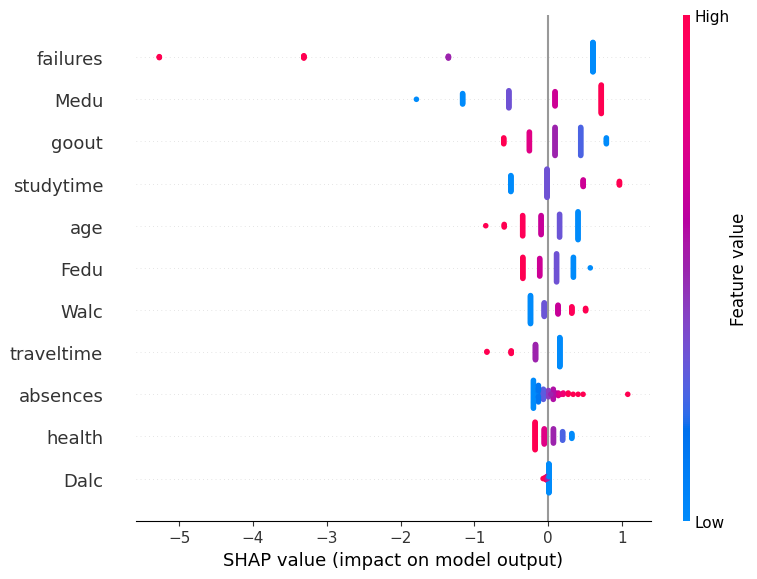

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap
import requests

# 2. Load dataset
# Replace with your own file path if you have a CSV
# Example dataset from UCI - math.csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
response = requests.get(url)
with open("student.zip", "wb") as f:
    f.write(response.content)

import zipfile
with zipfile.ZipFile("student.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

df = pd.read_csv("student-mat.csv", sep=";")

# 3. Select relevant features and target
features = [
    "studytime", "failures", "absences",
    "Medu", "Fedu", "health", "age", "traveltime",
    "goout", "Dalc", "Walc"
]
target = "G3"  # Final exam score

X = df[features]
y = df[target]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Baseline value (mean of target in training set)
baseline_value = np.mean(y_train)
print(f"Baseline value (mean final exam score): {baseline_value:.2f}")

# 7. Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 8. Verify prediction formula for each record
predictions = model.predict(X_test)

verification_df = pd.DataFrame({
    "Baseline": baseline_value,
    "Sum_SHAP": shap_values.values.sum(axis=1),
    "Predicted": predictions,
    "Baseline+SHAP": baseline_value + shap_values.values.sum(axis=1),
    "Actual": y_test.values
})

print("\nVerification sample:")
display(verification_df.head())

# 9. Interpretation
for i in range(5):  # Show first 5 students
    print(f"\n--- Student {i+1} ---")
    print(f"Actual Score: {y_test.values[i]}")
    print(f"Predicted Score: {predictions[i]:.2f}")
    diff = predictions[i] - y_test.values[i]
    if diff > 0:
        print(f"Overprediction by {diff:.2f} points")
    else:
        print(f"Underprediction by {abs(diff):.2f} points")

    # Feature impacts
    shap_contributions = pd.Series(shap_values.values[i], index=features)
    shap_contributions = shap_contributions.sort_values(key=abs, ascending=False)
    print("Top contributing features:")
    print(shap_contributions.head(3))

# 10. SHAP summary plot (optional visualization)
shap.summary_plot(shap_values.values, X_test, feature_names=features)